### Notebook's description
##### This notebook creates visualizations that describe the introduced data biases in the MIMIC-III dataset. In more detail, it computes and visualizes the "Representation Biases".
The notebook is divided into 3 sections and each section describes a specific type of bias, as listed below:
- Section #1: Representation of the real world population
- Section #2: Underrepresented populations
- Section #3: Imbalanced representation

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [50]:
df = pd.read_csv('data/dataframe_final.csv')
df

,SUBJECT_ID,Y_PRED,Y_TRUE,GENDER,LANGUAGE,INSURANCE,RELIGION,ETHNICITY,AGE
0,10011,1,1,0,1,1,1,0,1
1,10026,0,0,0,1,1,0,1,0
2,10030,0,0,1,1,1,1,1,0
3,10042,0,0,1,1,1,1,1,0
4,10094,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
3231,9970,0,0,1,1,1,1,1,1
3232,9977,0,0,1,1,1,1,1,0
3233,99863,0,0,1,0,1,1,1,1
3234,99883,0,0,1,1,1,1,1,0


#### Section #1: Representation of the real world population
##### Is the dataset sample representative of the real-world population?

In [51]:
# real population distributions in 2016 (MIMIC-III release year) in the USA
real_distributions = {
    "GENDER": {0: 50.75, 1: 49.25}, # 0: female, 1: male (https://www.statista.com/statistics/241495/us-population-by-sex/)
    "ETHNICITY": {0: 39.0, 1: 61.0}, # 0: non-white, 1: white (https://www.aecf.org/blog/what-population-data-say-about-race-and-ethnicity-in-america)
    "LANGUAGE": {0: 21.5, 1: 78.5},  # 0 non-english speakers, 1: english speakers (https://en.wikipedia.org/wiki/Languages_of_the_United_States)
    "INSURANCE": {0: 8.8 , 1: 91.2},  # 0: public or no insurance, 1: private insurance (https://www.census.gov/content/dam/Census/library/publications/2017/demo/p60-260.pdf)
    "RELIGION": {0: 26.3, 1: 73.7},  # 0: non-christian, 1: christian (https://en.wikipedia.org/wiki/Religion_in_the_United_States)
    "AGE": {0: 14.9 , 1: 85.1}  # 0: 65+, 1: <65 (https://www.census.gov/data/tables/2016/demo/age-and-sex/2016-age-sex-composition.html)
}
real_distributions

{'GENDER': {0: 50.75, 1: 49.25},
 'ETHNICITY': {0: 39.0, 1: 61.0},
 'LANGUAGE': {0: 21.5, 1: 78.5},
 'INSURANCE': {0: 8.8, 1: 91.2},
 'RELIGION': {0: 26.3, 1: 73.7},
 'AGE': {0: 14.9, 1: 85.1}}

In [52]:
# dataset population distributions in 2016 (MIMIC-III release year) in the USA
mimic_distributions = {
    "GENDER": {0: 0, 1: 0}, # 0: female, 1: male
    "ETHNICITY": {0: 0, 1: 0}, # 0: non-white, 1: white
    "LANGUAGE": {0: 0, 1: 0},  # 0 non-english speakers, 1: english speakers
    "INSURANCE": {0: 0, 1: 0},  # 0: public or no insurance, 1: private insurance
    "RELIGION": {0: 0, 1: 0},  # 0: non-christian, 1: christian
    "AGE": {0: 0, 1: 0}  # 0: 65+, 1: <65
}

for attribute in real_distributions:
    counts = df[attribute].value_counts()
    mimic_distributions.get(attribute).update(counts)
mimic_distributions

{'GENDER': {0: 1439, 1: 1797},
 'ETHNICITY': {0: 906, 1: 2330},
 'LANGUAGE': {0: 259, 1: 2977},
 'INSURANCE': {0: 36, 1: 3200},
 'RELIGION': {0: 496, 1: 2740},
 'AGE': {0: 1724, 1: 1512}}

In [53]:
# compute the ratio for each protected attribute
real_ratios = []
dataset_ratios = []
ratios = pd.DataFrame(columns=['attribute', 'real_ratio', 'dataset_ratio'])
for attribute in real_distributions.keys():
    attribute_ratio = list(real_distributions.get(attribute).values())[0] / list(real_distributions.get(attribute).values())[1]
    dataset_ratio = list(mimic_distributions.get(attribute).values())[0] / list(mimic_distributions.get(attribute).values())[1]

    real_ratios.append(attribute_ratio)
    dataset_ratios.append(dataset_ratio)

ratios["attribute"] = real_distributions.keys()
ratios["real_ratio"] = real_ratios
ratios["dataset_ratio"] = dataset_ratios
ratios

,attribute,real_ratio,dataset_ratio
0,GENDER,1.030457,0.800779
1,ETHNICITY,0.639344,0.388841
2,LANGUAGE,0.273885,0.087000
3,INSURANCE,0.096491,0.011250
4,RELIGION,0.356852,0.181022
5,AGE,0.175088,1.140212


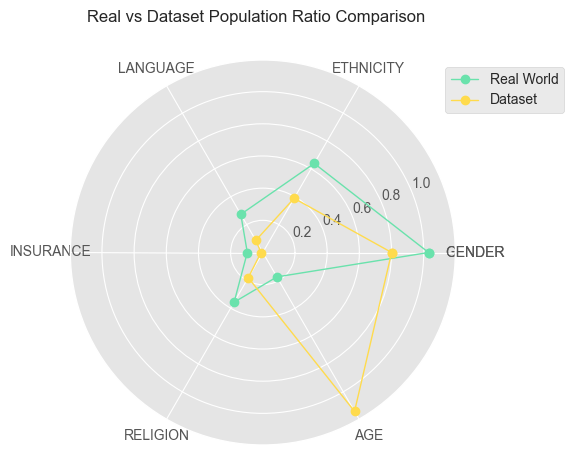

In [144]:
# create the radar plot to visualize the ratios
attributes = list(ratios['attribute'])
real = list(ratios['real_ratio'])
dataset = list(ratios['dataset_ratio'])

angles = np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])
real.append(real[0])
dataset.append(dataset[0])

# figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
ax.set_thetagrids(angles * 180/np.pi, attributes)
# real world distribution
ax.plot(angles,real, 'o-', color='#6ae2ac', linewidth=1, label='Real World')
# dataset distribution
ax.plot(angles,dataset, 'o-', color='#ffdb4d', linewidth=1, label='Dataset')
plt.suptitle('Real vs Dataset Population Ratio Comparison')
plt.legend(bbox_to_anchor=(1.3,1))
plt.savefig("images/radar_plot.png",bbox_inches='tight')
plt.show()

#### Section #2: Underrepresented populations
##### Are there underrepresented populations in the dataset?

In [145]:
# number of samples per protected attribute
representation_df = pd.DataFrame(columns=['Class', 'Samples', 'Attribute'])
for attribute in real_distributions.keys():
    attribute_df = df[attribute].value_counts().reset_index(drop=False)
    attribute_name = attribute_df.columns[0]
    attribute_df.rename(columns={attribute_df.columns[0]: 'Class', attribute_df.columns[1]: 'Samples'}, inplace=True)
    attribute_df['Attribute'] = attribute_name
    representation_df = pd.concat([representation_df, attribute_df], axis=0)
representation_df

,Class,Samples,Attribute
0,1,1797,GENDER
1,0,1439,GENDER
0,1,2330,ETHNICITY
1,0,906,ETHNICITY
0,1,2977,LANGUAGE
1,0,259,LANGUAGE
0,1,3200,INSURANCE
1,0,36,INSURANCE
0,1,2740,RELIGION
1,0,496,RELIGION


In [146]:
# add labels for the below plot
representation_df['Label'] = ['Male', 'Female', 'White', 'Non-White', 'English', 'Non-English', 'Insured', 'Uninsured', 'Christian', 'Non-Christian', '65+', '<65']
representation_df

,Class,Samples,Attribute,Label
0,1,1797,GENDER,Male
1,0,1439,GENDER,Female
0,1,2330,ETHNICITY,White
1,0,906,ETHNICITY,Non-White
0,1,2977,LANGUAGE,English
1,0,259,LANGUAGE,Non-English
0,1,3200,INSURANCE,Insured
1,0,36,INSURANCE,Uninsured
0,1,2740,RELIGION,Christian
1,0,496,RELIGION,Non-Christian


C:\Users\evapa\PycharmProjects\mimic3-benchmarks\venv\lib\site-packages\seaborn\categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


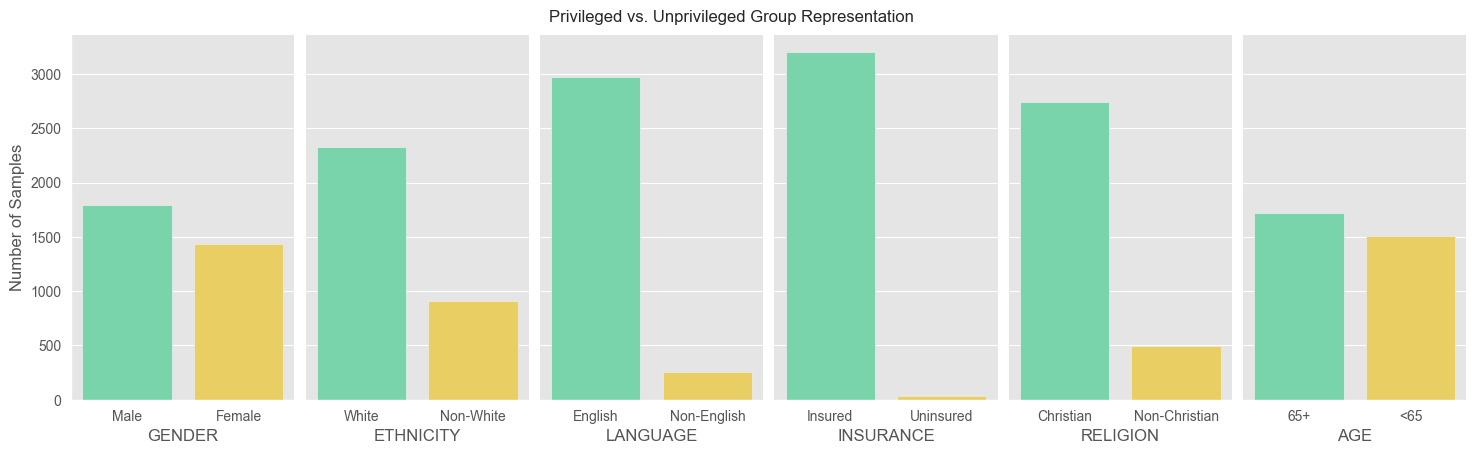

In [147]:
# create the plot to visualize the samples per class per protected attribute
g = sns.catplot(data=representation_df, x="Label", col="Attribute", y="Samples", kind='bar', sharex=False, palette=['#6ae2ac', '#ffdb4d'], aspect=.5)
g.set_titles("{col_name}")
g.set_ylabels('Number of Samples')
plt.suptitle("Privileged vs. Unprivileged Group Representation")
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
plt.subplots_adjust(wspace=0.05, bottom=0.2, left=0.06)
plt.savefig('images/bar_plot.png', bbox_inches='tight')
plt.show()

#### Section #3: Imbalanced representation
##### Are there imbalances in the labels across groups in the dataset?

In [148]:
# number of samples per class and label per protected attribute
imbalances_df = pd.DataFrame(columns=['Class', 'Label_Samples', 'Attribute'])
temp_df = df.loc[df['Y_TRUE'] == 1]
for attribute in real_distributions.keys():
    attribute_df = temp_df[attribute].value_counts().reset_index(drop=False)
    attribute_name = attribute_df.columns[0]
    attribute_df.rename(columns={attribute_df.columns[0]: 'Class', attribute_df.columns[1]: 'Label_Samples'}, inplace=True)
    attribute_df['Attribute'] = attribute_name
    imbalances_df = pd.concat([imbalances_df, attribute_df], axis=0)
imbalances_df

,Class,Label_Samples,Attribute
0,1,197,GENDER
1,0,177,GENDER
0,1,265,ETHNICITY
1,0,109,ETHNICITY
0,1,340,LANGUAGE
1,0,34,LANGUAGE
0,1,368,INSURANCE
1,0,6,INSURANCE
0,1,313,RELIGION
1,0,61,RELIGION


In [149]:
stacked_df = pd.DataFrame(columns=['Attribute', 'Privileged', 'Unprivileged'])
for attribute in real_distributions.keys():
    attribute_df = imbalances_df.loc[imbalances_df['Attribute']==attribute]
    privileged = int(attribute_df.loc[attribute_df['Class']==1]['Label_Samples'])
    unprivileged = int(attribute_df.loc[attribute_df['Class']==0]['Label_Samples'])
    row = pd.DataFrame([[attribute, privileged, unprivileged]])
    row.rename(columns={0: 'Attribute', 1: 'Privileged', 2:'Unprivileged'}, inplace=True)
    stacked_df = pd.concat([stacked_df, row], axis=0)
stacked_df

C:\Users\evapa\AppData\Local\Temp\ipykernel_16804\2583922292.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  privileged = int(attribute_df.loc[attribute_df['Class']==1]['Label_Samples'])
C:\Users\evapa\AppData\Local\Temp\ipykernel_16804\2583922292.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  unprivileged = int(attribute_df.loc[attribute_df['Class']==0]['Label_Samples'])


,Attribute,Privileged,Unprivileged
0,GENDER,197,177
0,ETHNICITY,265,109
0,LANGUAGE,340,34
0,INSURANCE,368,6
0,RELIGION,313,61
0,AGE,126,248


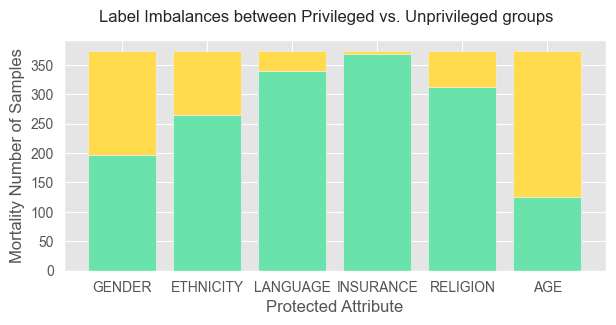

In [160]:
# create the plot to visualize the samples per label and class per protected attribute
fig = plt.figure(figsize=(7,3))
plt.bar(stacked_df['Attribute'], stacked_df['Privileged'], color='#6ae2ac')
plt.bar(stacked_df['Attribute'], stacked_df['Unprivileged'], bottom=stacked_df['Privileged'], color='#ffdb4d')
plt.suptitle("Label Imbalances between Privileged vs. Unprivileged groups")
plt.xlabel('Protected Attribute')
plt.ylabel('Mortality Number of Samples')
plt.savefig('images/stacked_plot.png', bbox_inches='tight')
plt.show()